Author: Velibor Zeli

This document is released under a common license, allowing for broad usage and distribution.

# Mathematics behind amortized loans

#### Example 1
    
Jim wants to borrow $P_1$ from the bank. He takes an amortized loan with monthly interest rate of $r$ and agrees to make 3 payments $A$ so that he repays the loan in 3 months.

Payment schedule:

|  Month  | Principal | Interest |  Payment |
|---------|-----------|----------|----------|
|    1    |   $P_1$   |  $P_1r$  |    A     |
|    2    |   $P_2$   |  $P_2r$  |    A     |
|    3    |   $P_3$   |  $P_3r$  |    A     |
|    4    | $P_4 = 0$ |    0     |    0     |

where $P_1 \gt P_2 \gt P_3 \gt P_4$.

Derivation:

After the first month Jim owes the interest on the initial principal $P_1 r$ and makes a payment $A$ which covers the interest and, the leftover, reduces the outstanding principal. The outstanding principal $P_2$ is than
    
$$ P_2 = P_1 r - A.$$

After the second month Jim owns the interest $P_2 r$ on the outstanding principal $P_2$ and makes another payment $A$. This further reduces his outstanding principal to

$$P_3 = P_2r - A = (P_1 r - A)r - A.$$

Finally, after the third month Jim makes the last payment $A$ and pays off the interest on the remaining principal and settles the loan

$$ P_4 = P_3 r - A = ((P_2 r - A)r - A) = (((P_1r - A) r - A)r - A).$$

After the final payment the loan is settled so $P_4 = 0$. Solving the above equation for $A$ using the geometric progression series gives

$$ A = P \frac{r}{1 - \left( \frac{1}{1 + r} \right)^T}, \qquad (1)$$

where the symbols denote

* monthly payment $A$
* loan principal $P$
* monthly interest rate $r$
* loan term $T$ in months.

For a more detailed derivation see [Wikipedia](https://en.wikipedia.org/wiki/Amortization_calculator).

---

#### Example 2A

Sue wants to borrow 1 000 SEK from the bank with 4% annual interest rate and agrees to repay the loan in 1 year.

- What is her monthly payment?
- How much money, in total, does she give to the bank after the loan is settled?

Parameters:
- `p = 1_000`
- `r = 0.04`
- `T = 1`

In [1]:
from loan_model import get_payment

In [2]:
p, r, T = 1_000, 0.04, 1

In [3]:
A = get_payment(p, r, T)

In [4]:
print(f"Monthly payment: {A:.2f} SEK")

Monthly payment: 85.15 SEK


In [5]:
print(f"Total: {12 * T * A:.2f} SEK ({12 * T * A/p:.2%} of P)")

Total: 1021.80 SEK (102.18% of P)


The bank receives

$$\frac{85.15}{1,000.00} = 8.51\% ,$$

for the first payment and the net profit on the loan is

$$\eta = \frac{1,021.80-1,000.00}{1,000.00} = 2.18\% ,$$

and is **less than the annual interest rate 4.00%, on which Sue borrowed, because Sue held the loan for one year and the outstanding principal is a strictly decreasing function of time.**

---

#### Example 2B

How does the same scenario look like if Sue borrowed the money for 10 years?

Parameters:
- `P = 1_000`
- `r = 0.04`
- `T = 10`

In [6]:
p, r, T = 1_000, 0.04, 10

In [7]:
A = get_payment(p, r, T)

In [8]:
print(f"Monthly payment: {A:.2f} SEK")

Monthly payment: 10.12 SEK


In [9]:
print(f"Total: {12 * T * A:.2f} SEK ({12 * T * A/p:.2%} of P)")

Total: 1214.94 SEK (121.49% of P)


The bank receives

$$\frac{10.12}{1,000.00} = 1.01\% ,$$

in the first month and the net profit on the loan is

$$\eta = \frac{1,214.94-1,000.00}{1,000.00} = 21.49\% .$$

In this scenario, **the monthly payment is lower than in the previous scenario but the net profit for the bank is much since Sue decided to hold the loan for longer.**

---

### Dynamics of Amortized Loans

Amortized loans are payed off with monthly payments $A_n$ that compose of

- interest payments $ I_n $
- amortization $ A_n^\prime $ - part that reduces the outstanding principal

Therefore, we can write

$$ A_n = I_n + A_n^\prime .$$

#### Example 3A

Consider a millennial Svensson family that wants to take on a mortgage and borrow 2 500 000 SEK for 30 years assuming that the family gets 4.5% interest rate.

* How does the outstanding principle decrease with time?
* How much interest is payed for the loan in total after the loan is settled?

Parameters:
- `P = 2_500_000`
- `r = 0.045`
- `T = 30`

In [10]:
p, r, T = 2_500_000, 0.045, 30

In [11]:
A = get_payment(p, r, T)

In [12]:
print(f"Monthly payment: {round(A,-2):,.0f} SEK")

Monthly payment: 12,700 SEK


Visualization:

In [13]:
from plotting import plot_loan_dynamics

Principal: 2,500,000 SEK; Interest rate: 4.50%; Term: 30 Y => 82.41%


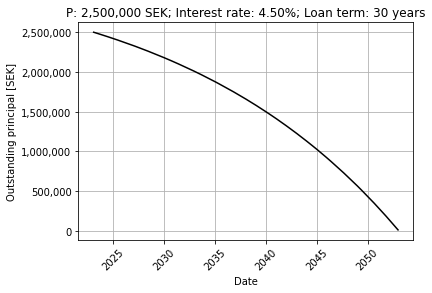

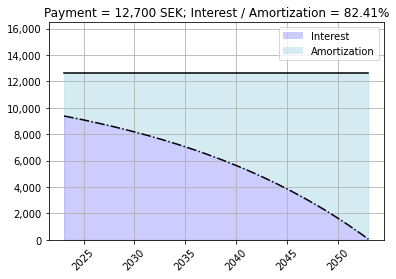

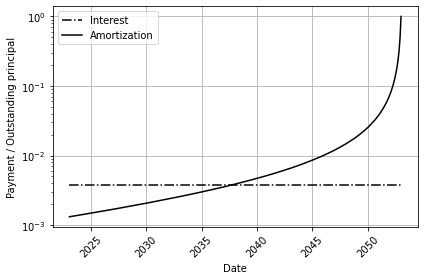

In [14]:
plot_loan_dynamics(p, r, T)

#### Example 3B

How much would the Svenssons pay for the same mortgage if their interest rates were 3% or 6%? 

Parameters:
- `P = 2_500_000`
- `r1 = 0.030`, `r2 = 0.045`, `r3 = 0.060`
- `T = 30`

| Principal [SEK] | Rate [%/Y]          | Term [Y] | $\eta$ [%] | $I/A$ [%] |
|-----------------|---------------------|----------|------------|-----------|
| 2 500 000       | 3.0                 | 30       |  51.78     |  51.78    |
| 2 500 000       | 4.5                 | 30       |  82.41     |  82.41    |
| 2 500 000       | 6.0                 | 30       | 115.84     | 115.84    |

Observe that the equality $ \eta = \frac{I}{A} $ implies that **the net profit for the lender is the payed interest.**

#### Example 3C

How much would the Svenssons pay if they decide to pay off the loan, with the original parameters, in 10 or 20 years instead? 

Parameters:
- `P = 2_500_000`
- `r = 0.045`
- `T1 = 10`, `T2 = 20`, `T3 = 30`

| Principal [SEK] | Rate [%/Y]          | Term [Y] | $\eta$ [%] | $I/A$ [%] |
|-----------------|---------------------|----------|------------|-----------|
| 2 500 000       | 4.5                 | 10       | 24.37      | 24.37     |
| 2 500 000       | 4.5                 | 20       | 51.84      | 51.84     |
| 2 500 000       | 4.5                 | 30       | 82.41      | 82.41     |

---

### Time Value of Money

#### Example 3D

Consider the same scenario in which the Svenssons what to borrow 2 500 000 SEK with interest rate 4.5% and they can choose either loan term 10, 20 or 30 years. Assume that money markets offer a flat continuously-compounded rate of 1.5% over the same period. How does this affect the valuation of future cash flows?

Parameters:
- `P = 2_500_000`
- `r = 0.045`
- `T1 = 10`, `T2 = 20`, `T3 = 30`
- `rf = 0.015`

| Principal [SEK] | Rate [%/Y]          | Term [Y] | $\eta$ [%] | $I/A$ [%] |
|-----------------|---------------------|----------|------------|-----------|
| 2 500 000       | 4.5                 | 10       | 15.41      | 25.06     |
| 2 500 000       | 4.5                 | 20       | 31.09      | 55.26     |
| 2 500 000       | 4.5                 | 30       | 46.80      | 91.69     |

---

### Sensitivities

#### Net profit $\eta$

Net profit is defined as the sum of all payments divided by the initial principal

$$ \eta = \frac{A \, T}{P}, \qquad (2)$$

and represents the return on the loaned capital for the lender and the total loan cost for the borrower. Substituting (1) in (2) gives

$$ \eta = \frac{r \; T}{1 - \left( \frac{1}{1 + r} \right)^T}. \qquad (3)$$

The total change of the net profit with respect to $r$ and $T$ is approximated with Taylor expansion

$$ \mathrm{d} \eta \approx \frac{\partial \eta}{\partial r} \mathrm{d}r + \frac{\partial \eta}{\partial T} \mathrm{d}T + \frac{1}{2!} \frac{\partial^2 \eta}{\partial r^2} {\mathrm{d}r}^2 + \frac{\partial^2 \eta}{\partial r \partial T} {\mathrm{d}r}{\mathrm{d}T} + \frac{1}{2!} \frac{\partial^2 \eta}{\partial T^2} {\mathrm{d}T}^2, \qquad (4)$$

where $\frac{\partial \eta}{\partial r}$, $\frac{\partial \eta}{\partial T}$, $\frac{\partial^2 \eta}{\partial r^2}$, $\frac{\partial^2 \eta}{\partial r \partial T}$ and $\frac{\partial^2 \eta}{\partial T^2}$ are the sensitivities and $\mathrm{d}r$ and $\mathrm{d}T$ are the respective changes of $r$ and $T$. These derivatives are very similar to the so-called greeks in the option pricing theory.

The first-order terms are dominant for small changes in $r$ and $T$. These can be expanded

$$\frac{\mathrm{d}\eta}{\mathrm{d}T} = r \frac{1 - \left( \frac{1}{1 + r}\right)^T \left(1 - T \ln \left( \frac{1}{1 + r} \right)\right)}{\left( 1 - \left( \frac{1}{1 + r} \right)^T \right)^2},$$

and

$$ \frac{\mathrm{d}\eta}{\mathrm{d}r} =  T \frac{1 - \left(\frac{1}{1 + r}\right)^T \left( 1 + r T \left(\frac{1}{1 + r}\right)\right)}{\left(1 - \left(\frac{1}{1 + r}\right)^T\right)^2}.$$

Interested reader is encouraged to find the higher-order derivatives and apply (4) on the problem setup given in **Example 3**.

#### Example 4

Plot the net profit $\eta$ for the loan term $T \in [5,30]$ years when the interest rates are 3%, 4.5% and 6%.

Parameters:

- `r1 = 0.030`, `r2 = 0.045`, `r3 = 0.060`

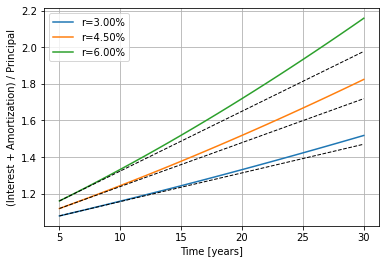

In [15]:
from plotting import plot_total_payment_wrt_time

r1, r2, r3 = 0.030, 0.045, 0.060
plot_total_payment_wrt_time([r1, r2, r3])

Dashed lines (--) are tangents on the curves at the first point ($T = 5$ years). Because tangents are linear functions it is visually obvious that the net profit is a non-linear and strictly increasing function with respect to $T$. 

**This is one of the things to keep in mind when planning personal finances.**

#### Loan term $T$

Similar to the sensitivities found for the [net profit](http://localhost:8888/notebooks/Amortized%20Loans.ipynb#Neto-return), it is also possible to solve (1) for the loan term and find that

$$ T = \frac{\ln\left(1 - r \rho^{-1} \right)}{\ln\left( \frac{1}{1+r} \right)}, $$

where $\rho = \frac{A}{P}$ is the percentage of the loan principle that is re-payed each month.

After carrying out a similar analysis to [net profit](http://localhost:8888/notebooks/Amortized%20Loans.ipynb#Neto-return) it is found that the first-order terms $\frac{\partial T}{\partial r}$ and $\frac{\partial T}{\partial \rho}$ are a good approximation for the small changes of $r$ and $\rho$. The respective sensitivities are given as

$$ \frac{\partial T}{\partial r} = \frac{1}{(r-\rho)\ln\left(\frac{1}{1+r}\right)} + \frac{\ln\left(1 - r \rho^{-1}\right)}{(1+r)\ln^2\left(\frac{1}{1+r}\right)}, $$

and

$$ \frac{\partial T}{\partial \rho} =  - \frac{r}{\rho (r-\rho) \ln\left(\frac{1}{1+r}\right)}. $$


The figures show that $\frac{\partial T}{\partial r} > 0$ and $\frac{\partial T}{\partial \rho} < 0$ . This means that increasing $r$ increases $T$ while increasing $A$ and repaying the loan faster increases $\rho$ but decreases $T$.

------

### Take Away

What can we do with this information?

#### Make a Plan

From the four parameters that describe an amortized loan

- payment $A$
- loan principal $P$
- interest rate $r$
- loan term $T$,

we have _direct control_ over

- $P$ 
- $A$ or $T$ because $A = A(r, T)$ and $T = T(r, A)$.

and we have _limited control_ over $r$ because $r = r(T)$.

=> **We can have good control of all the risks of borrowing money with amortized loan before taking the loan.**

#### Renegotiating the Loan and Tune the Parameters in Your Favor

Considering the loan with parameters $A$, $P$, $r$ and $T$ we can actively change one of them and the others are indirectly changed.

=> **Finding the sensitivities helps in calculating how the total loan cost changes with respect to the changing parameter.**